In [ ]:
!pip install spacy
!python -m spacy download en_core_web_sm
!pip install beautifulsoup4
!pip install textblob
!pip install preprocess_kgptalkie

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 27.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/laxmimerit/All-CSV-ML-Data-Files-Download/master/twitter_sentiment.csv', header=None, index_col=0)

df.head()

,1,2,3
0,,,
2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2401,Borderlands,Positive,im coming on borderlands and i will murder you...
2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [ ]:
# @title char_counts

from matplotlib import pyplot as plt
df['char_counts'].plot(kind='hist', bins=20, title='char_counts')
plt.gca().spines[['top', 'right',]].set_visible(False)

KeyError: 'char_counts'

In [ ]:
df = df[[2,3]].reset_index(drop=True)

In [ ]:
df.columns = ['sentiment', 'text']
df

,sentiment,text
0,Positive,im getting on borderlands and i will murder yo...
1,Positive,I am coming to the borders and I will kill you...
2,Positive,im getting on borderlands and i will kill you ...
3,Positive,im coming on borderlands and i will murder you...
4,Positive,im getting on borderlands 2 and i will murder ...
...,...,...
75677,Irrelevant,⭐️ Toronto is the arts and culture capital of ...
75678,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
75679,Positive,Today sucked so it’s time to drink wine n play...
75680,Positive,Bought a fraction of Microsoft today. Small wins.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75682 entries, 0 to 75681
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  75682 non-null  object
 1   text       74996 non-null  object
dtypes: object(2)
memory usage: 1.2+ MB


In [ ]:
# data cleaning
df.isnull().sum()
df.dropna(inplace=True)


In [ ]:
sum(df['text'].apply(len)>5), sum(df['text'].apply(len)<5)

(72883, 1773)

In [ ]:
print(df.shape)
df = df[df['text'].apply(len)>5]
print(df.shape)

(74996, 2)
(72883, 2)


In [ ]:
df['sentiment'].value_counts()

,count
sentiment,
Negative,22020
Positive,20186
Neutral,17899
Irrelevant,12778


In [ ]:
!pip install git+https://github.com/laxmimerit/preprocess_kgptalkie.git --upgrade --force-reinstall

  Cloning https://github.com/laxmimerit/preprocess_kgptalkie.git to /tmp/pip-req-build-aclz4lge
  Running command git clone --filter=blob:none --quiet https://github.com/laxmimerit/preprocess_kgptalkie.git /tmp/pip-req-build-aclz4lge
  Resolved https://github.com/laxmimerit/preprocess_kgptalkie.git to commit 0f56a6502679f6750b7f0ffed98f590d1f0246bd
  Preparing metadata (setup.py) ... done
  Created wheel for preprocess_kgptalkie: filename=preprocess_kgptalkie-0.11-py3-none-any.whl size=8175 sha256=26593865fa3de1f1064fbfefaca07911ef8afe798e6cc34f6fd6d1ed921bd092
  Stored in directory: /tmp/pip-ephem-wheel-cache-rmhbj9hq/wheels/5c/94/34/99d5ff65e88b8d9a6c5e8d8652f2311d87790a61a1b7466e21
Successfully built preprocess_kgptalkie
  Attempting uninstall: preprocess_kgptalkie
    Found existing installation: preprocess_kgptalkie 0.11
    Uninstalling preprocess_kgptalkie-0.11:
      Successfully uninstalled preprocess_kgptalkie-0.11


In [ ]:
df.columns

Index(['sentiment', 'text'], dtype='object')

In [ ]:
!pip install preprocess_kgptalkie
!pip install googletrans
import preprocess_kgptalkie as ps
df = ps.extract_features(df)
df.head()

AttributeError: 'DataFrame' object has no attribute 'split'

In [ ]:
df.columns

Index(['sentiment', 'text'], dtype='object')

In [ ]:
df.head()

,sentiment,text,char_counts,word_counts,avg_wordlength,stopwords_counts,hashtag_counts,mentions_counts,digits_counts,uppercase_counts
0,Positive,im getting on borderlands and i will murder yo...,43,11,3.909091,6,0,0,1,0
1,Positive,I am coming to the borders and I will kill you...,40,12,3.333333,6,0,0,1,2
2,Positive,im getting on borderlands and i will kill you ...,41,10,4.100000,5,0,0,1,0
3,Positive,im coming on borderlands and i will murder you...,42,10,4.200000,5,0,0,1,0
4,Positive,im getting on borderlands 2 and i will murder ...,46,12,3.833333,6,0,0,2,0


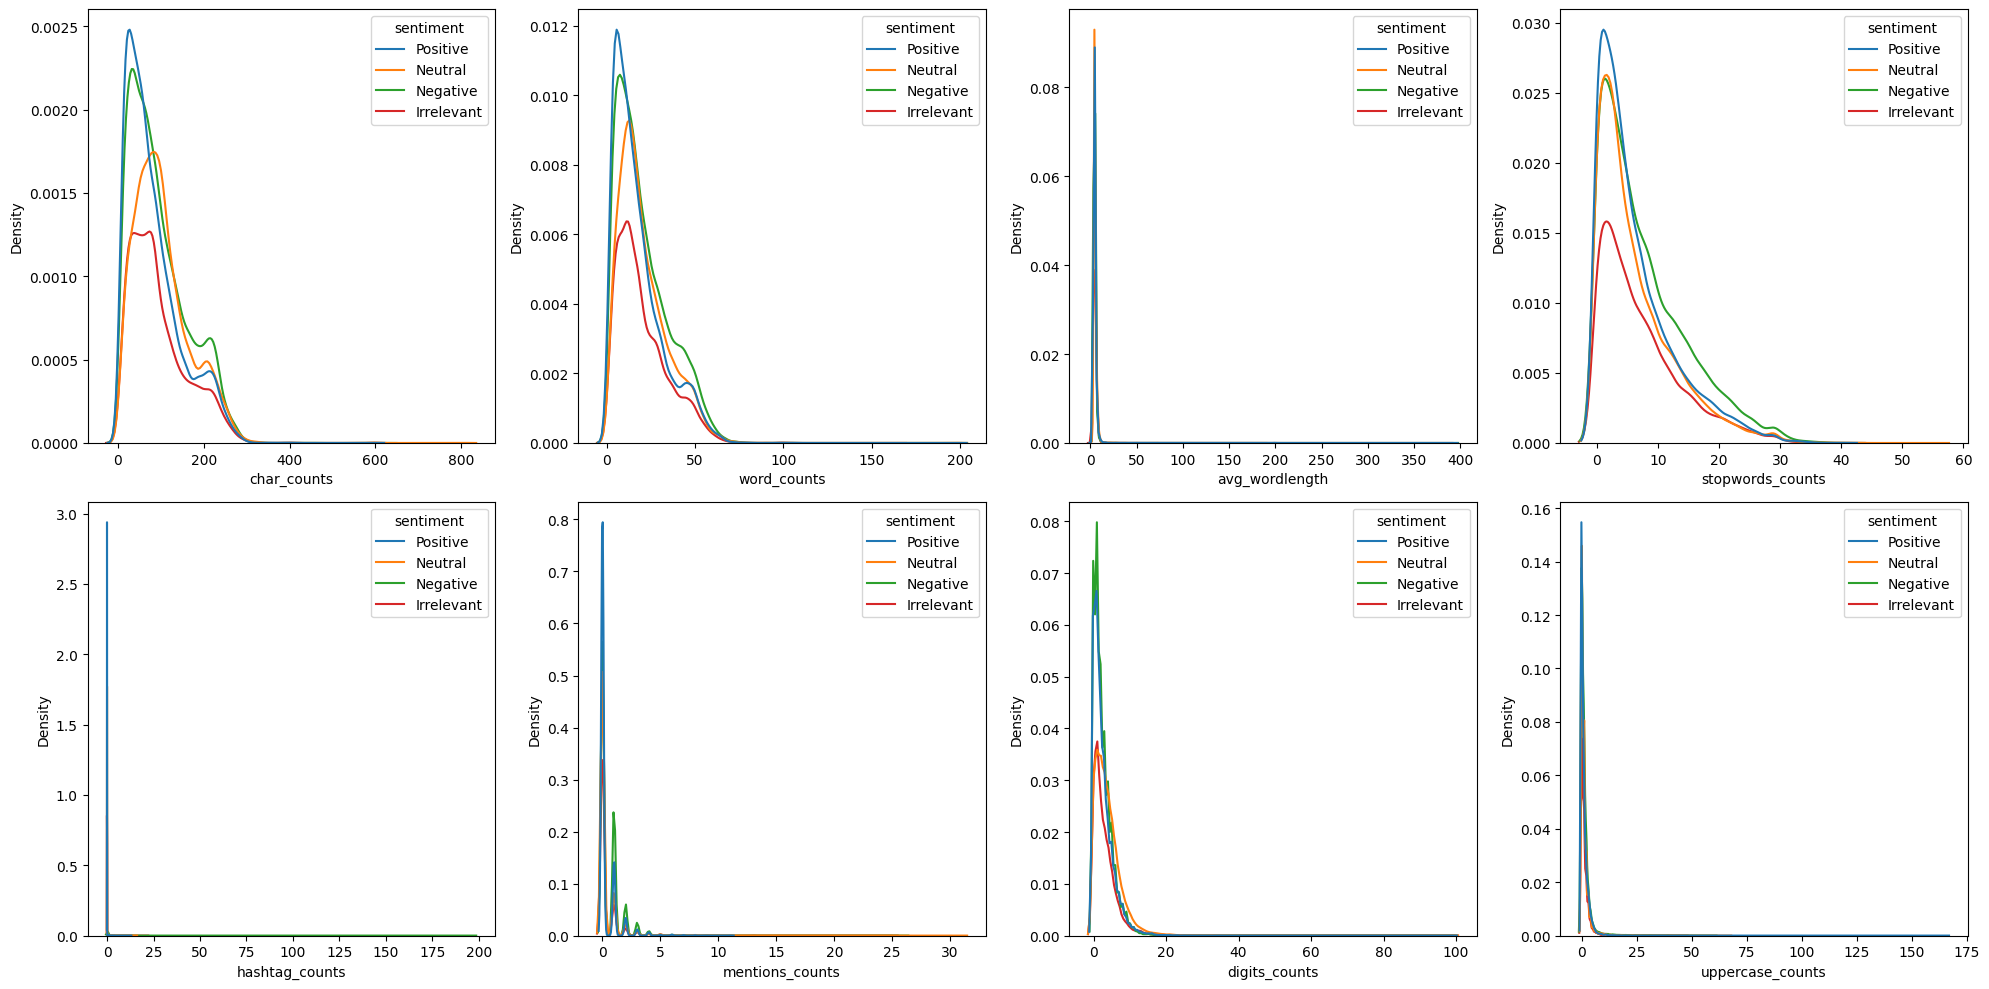

In [ ]:
# data vis
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,10))
num_cols = df.select_dtypes(include='number').columns

for index, col in enumerate(num_cols):
  plt.subplot(2,4, index + 1)
  sns.kdeplot(data=df, x=col, hue="sentiment")

plt.tight_layout()
plt.show()

Negative      30.212807
Positive      27.696445
Neutral       24.558539
Irrelevant    17.532209
Name: sentiment, dtype: float64

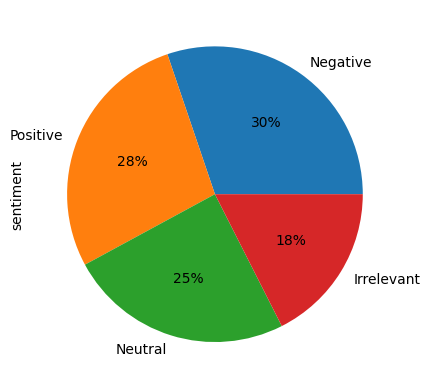

In [ ]:
df['sentiment'].value_counts().plot(kind="pie", autopct="%1.0f%%")
sentiment_counts = df['sentiment'].value_counts()
total_values = len(df['sentiment'])
percentage = (sentiment_counts / total_values) * 100

percentage


In [ ]:
!pip install wordcloud

from wordcloud import STOPWORDS, WordCloud
stopwords = set(STOPWORDS)
stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

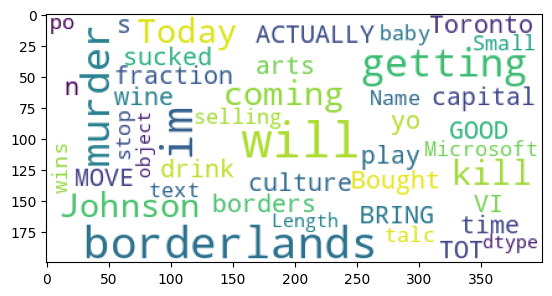

In [ ]:
import matplotlib.pyplot as plt
wordcloud = WordCloud(background_color='white', stopwords=stopwords, max_font_size=40).generate(str(df['text']))
plt.imshow(wordcloud)

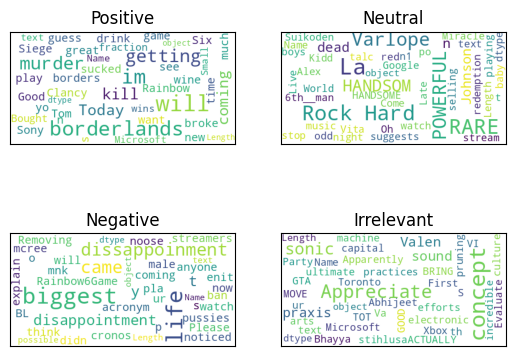

In [ ]:
plt.figure()
for index, sent in enumerate(df['sentiment'].unique()):
  plt.subplot(2,2, index+1)
  data = df[df['sentiment'] == sent]['text']
  wordcloud = WordCloud(background_color='white', stopwords=stopwords, max_font_size=40).generate(str(data))
  plt.imshow(wordcloud)
  plt.xticks([])
  plt.yticks([])
  plt.title(sent)

In [ ]:
# data preprocssing:
df['text'] = df['text'].apply(lambda x: x.lower())
df['text'] = df['text'].apply(lambda x: ps.remove_urls(x))
df['text'] = df['text'].apply(lambda x: ps.remove_html_tags(x))
df['text'] = df['text'].apply(lambda x: ps.remove_rt(x))
df['text'] = df['text'].apply(lambda x: ps.remove_special_chars(x))
df['text'] = df['text'].apply(lambda x: ps.remove_stop_words(x))


In [ ]:
# train test split
from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(df['text'], df['sentiment'], test_size = 0.2, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['sentiment'], test_size = 0.2)


In [ ]:
X_train.shape, X_test.shape

((58306,), (14577,))

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

In [ ]:
clf = Pipeline([('tfid', TfidfVectorizer()), ('rfc', RandomForestClassifier(n_jobs=-1))])

clf.fit(X_train, y_train)


Pipeline(steps=[('tfid', TfidfVectorizer()),
                ('rfc', RandomForestClassifier(n_jobs=-1))])

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
result = clf.predict(X_test)
print(classification_report(y_test, result))

              precision    recall  f1-score   support

  Irrelevant       0.96      0.86      0.91      2597
    Negative       0.93      0.95      0.94      4407
     Neutral       0.92      0.91      0.92      3538
    Positive       0.88      0.94      0.91      4035

    accuracy                           0.92     14577
   macro avg       0.93      0.91      0.92     14577
weighted avg       0.92      0.92      0.92     14577



In [ ]:
import pickle
pickle.dump(clf, open("twitter_model.pkl", 'wb'))

In [ ]:
clf.predict(['Todays weather is so bad!'])

array(['Negative'], dtype=object)

In [ ]:
clf.predict(['This is good'])

array(['Positive'], dtype=object)

In [ ]:
clf.predict(['How the hell we are in halloween already'])

array(['Irrelevant'], dtype=object)

In [ ]:
clf.predict(["GOJO SATORU WINS “BEST SUPPORTING CHARACTER” AWARD AT CRUNCHYROLL ANIME AWARDS!!"])


array(['Positive'], dtype=object)

In [ ]:
clf.predict(["I booked a room in the hotel"])

array(['Neutral'], dtype=object)